## 0. Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## 1. Loading of the dataset

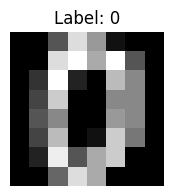

In [2]:
# Load and Inspect Data
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Preview one sample
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()

## 2. Preparation of the dataset

In [3]:
# Split Data (80% Train, 20% Test)
# Stratify ensures the train/test sets have the same proportion of digits (0-9)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling is crucial for SVM to work correctly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Definition of the model


--- Linear SVM ---
Accuracy: 0.9750
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



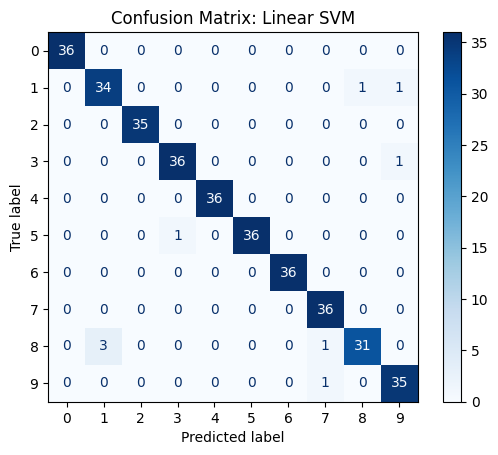


--- RBF SVM ---
Accuracy: 0.9750
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



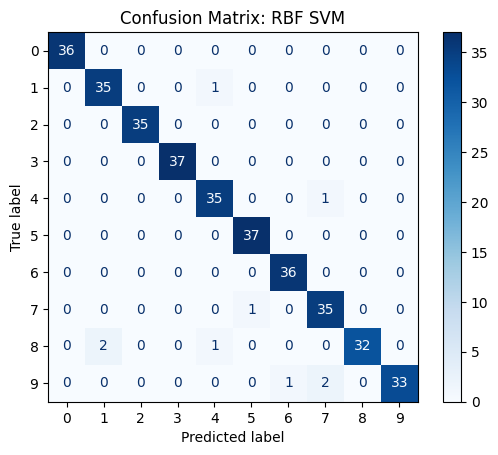

Running Grid Search...
Best Params: {'C': 10, 'gamma': 0.01}


In [4]:
# Train different models

# Helper Function to Evaluate Models
def evaluate_model(model, X_test, y_test, title):
    """Predicts, prints accuracy, and plots confusion matrix."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n--- {title} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

# Model 1: Linear Kernel
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train_scaled, y_train)

evaluate_model(svc_linear, X_test_scaled, y_test, "Linear SVM")

# Model 2: RBF Kernel (Non-Linear)
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train_scaled, y_train)

evaluate_model(svc_rbf, X_test_scaled, y_test, "RBF SVM")

# Model 3: Hyperparameter Tuning (GridSearchCV)
print("Running Grid Search...")

param_grid = {
    'C': [0.1, 1, 10],            # Regularization strength
    'gamma': ['scale', 0.01]      # Kernel coefficient
}

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Params: {grid_search.best_params_}")

## 4. Evaluation of the model


--- Tuned RBF SVM ---
Accuracy: 0.9833
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      1.00      0.97        36
           8       1.00      0.94      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



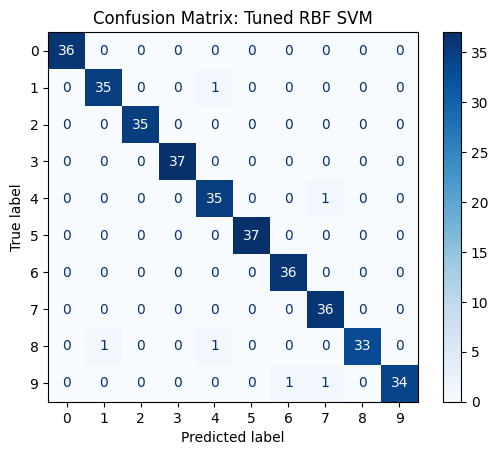

In [5]:
# Evaluate the best model found
evaluate_model(grid_search.best_estimator_, X_test_scaled, y_test, "Tuned RBF SVM")